<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Support_Vector_Machines_Exercises/blob/main/soft_margin_svm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question:**

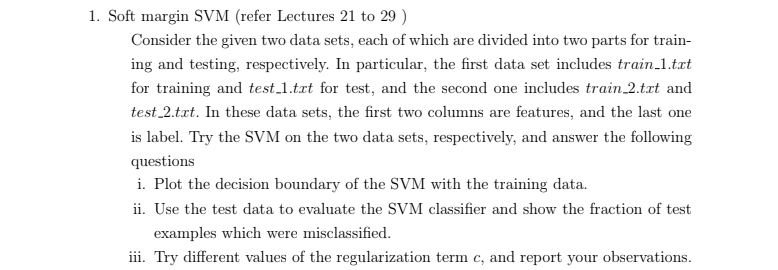

#**Answer:1(b)**

##**Data Analysis**

###***Read Training Set***

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
# read training set 2 and convert into pandas dataframe
df = pd.read_csv('train_2.txt', delim_whitespace=' ', header=None)

# display the data
print(df)

               0           1  2
0      84.353392  130.449270  1
1     100.524960   79.702516 -1
2      89.512684  124.804950  1
3     113.372110   94.912111 -1
4     100.086890  108.298000  1
...          ...         ... ..
1495  127.383310  108.866020 -1
1496   79.274823  120.213030  1
1497   91.066948   96.026221  1
1498  143.936260   81.663392 -1
1499  112.942630   94.530109 -1

[1500 rows x 3 columns]


###***Basic Details***

In [ ]:
# rows and columns
print(df.shape)

(1500, 3)


* Number of **Rows = 1500**
* Number of **Columns = 3**
* Number of **Features = 2**

In [ ]:
# basic statistical details
print(df.describe())

                 0            1            2
count  1500.000000  1500.000000  1500.000000
mean    106.091354   105.364102    -0.028000
std      17.823672    17.620441     0.999941
min      48.572853    54.216456    -1.000000
25%      94.033269    92.925800    -1.000000
50%     105.889885   105.668910    -1.000000
75%     118.513115   117.982255     1.000000
max     164.686740   160.437410     1.000000


* Both features have almost same set of minimum and maximum values.

###***Check for Null Values***

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB
None


* **No null value** is present in the dataset

###***Features Distribution***

Text(0.5, 0, 'X2')

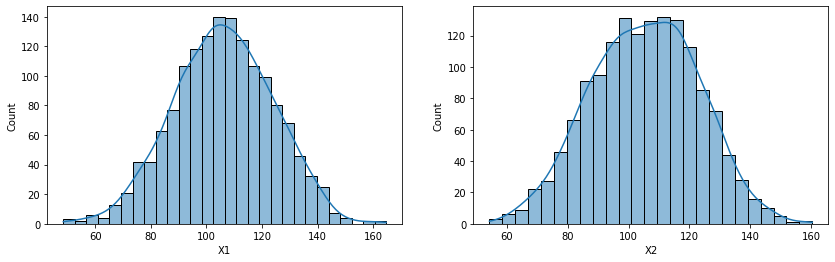

In [ ]:
plt.figure(figsize=(14,4))
# plot the histogram of 1st feature data
plt.subplot(121)
sns.histplot(data=df, x=0, kde=True)
plt.xlabel('X1')
# plot the histogram of 2nd feature data
plt.subplot(122)
sns.histplot(data=df, x=1, kde=True)
plt.xlabel('X2')

* Both feature values are normally distributed. Since both of them have almost same range too, we do not need to feature scale these.

##**Data Visualization**

Text(0.5, 1.0, 'Training Data')

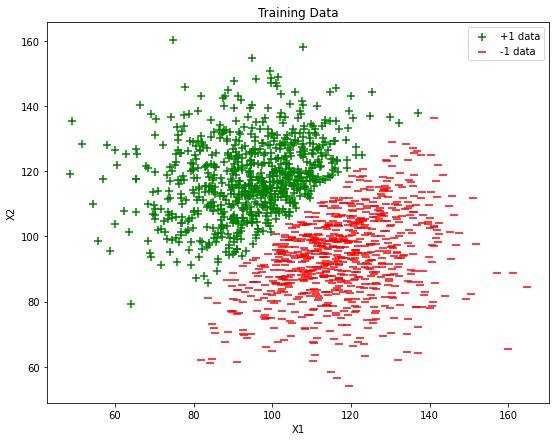

In [ ]:
# scatter plot
# output +1 => green and '+'
# output -1 => red and '-'
plt.figure(figsize=(9,7))
df1 = df.loc[df[2]==1]
df2 = df.loc[df[2]==-1]
plt.scatter(df1[0], df1[1], color='green', marker='+', s=60)
plt.scatter(df2[0], df2[1], color='red', marker='_', s=60)
plt.legend(['+1 data','-1 data'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data')

##**Test Data**

###***Read Test Data***

In [ ]:
# read test dataset 2 and convert into pandas dataframe
test_df = pd.read_csv('test_2.txt', delim_whitespace=' ', header=None)

# size of the dataset
print(test_df.shape)

# display the data
print(test_df)

(500, 3)
              0           1  2
0     64.878770  102.692150  1
1    108.984550  124.639570  1
2    115.183720  111.992980 -1
3     86.276196   78.977226 -1
4     85.926823  109.058520  1
..          ...         ... ..
495   75.765429  119.378500  1
496   83.267862  106.453910  1
497  105.834710  131.771550  1
498  100.267270  119.878590  1
499   88.224334  120.215620  1

[500 rows x 3 columns]


* There are **500** instances in the test data

##**SVM Implementation**

###**Function to Plot**

In [ ]:
# this function will provide the scatter plots

def plot_fun(model, df, color1, color2, flag):

  # separating +1 and -1 data
  df1 = df.loc[df[2]==1]
  df2 = df.loc[df[2]==-1]
  plt.scatter(df1[0], df1[1], color=color1, marker='+', s=60)
  plt.scatter(df2[0], df2[1], color=color2, marker='_', s=60)
  plt.legend(['+1 data','-1 data'])
  plt.xlabel('X1')
  plt.ylabel('X2')

  # plot the decision function
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  XX, YY = np.meshgrid(xx, yy)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = model.decision_function(xy).reshape(XX.shape)

  # training set
  if flag==1:
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
              linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')
  
  # test set
  elif flag==0:
    ax.contour(XX, YY, Z, colors='k', levels=0, alpha=0.5,
              linestyles='-')

###**Function to Find Error**

In [ ]:
# This function will provide the error

def err_fun(model, df):

  # prediction with the learned model
  predicted_labels = model.predict(df.iloc[:,:-1])
  error_count = 0

  # comparison with actual label
  for i in range(df.shape[0]):
    if predicted_labels[i] != df.iloc[i,-1]:
      error_count = error_count + 1

  # returns the error percentage
  return (error_count * 100 / df.shape[0])

###**Function to Train SVM**

In [ ]:
# This function will train the SVM and do all other needed operations
def svm_fun(df, test_df, c):

  # training
  model = svm.SVC(kernel='linear', C = c)
  model.fit(df.iloc[:,:-1], df.iloc[:,-1])

  plt.figure(figsize=(15,6))

  # plot with training data
  plt.subplot(121)
  plt.title('Training Data, C = %s'%(c))
  plot_fun(model, df, 'green', 'red', 1)

  # plot with test data
  plt.subplot(122)
  plt.title('Test Data, C = %s'%(c))
  plot_fun(model, test_df, 'blue', 'magenta', 0)

  # support vector details
  print(f"{30*'==='}\n")
  print(f"Softmargin SVM with C = {c}\n")
  print(f"There are {len(model.support_vectors_)} support vectors in total.")
  print(f"\nThey are as follows:\n")
  for i in range(len(model.support_vectors_)):
    print(f"{i+1}. {model.support_vectors_[i]}\tLamda = \
    {model.dual_coef_[0][i]/(df.iloc[model.support_[i],-1])}")

  # error calculation
  print(f"\nTraining Error = {err_fun(model, df)} %")
  print(f"Testing Error = {err_fun(model, test_df)} %\n")

###**SVM with C = 1000**


Softmargin SVM with C = 1000

There are 3 support vectors in total.

They are as follows:

1. [100.9311  100.73895]	Lamda =     1.4346494059658448
2. [136.98964 137.81944]	Lamda =     0.2514763440339153
3. [92.264228 93.878451]	Lamda =     1.1831730619319272

Training Error = 0.0 %
Testing Error = 0.0 %



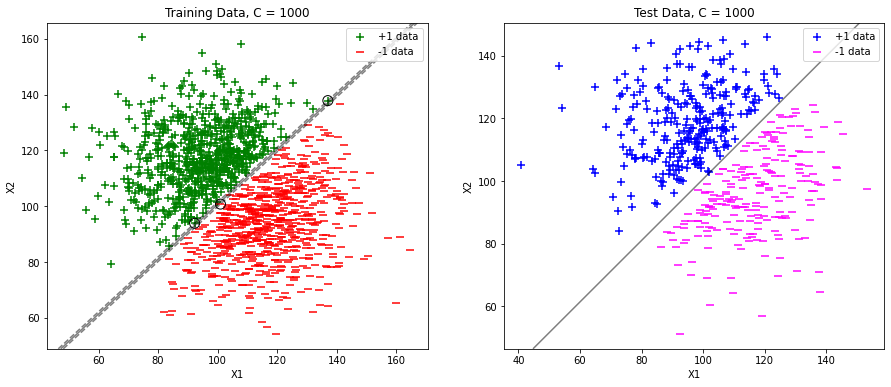

In [ ]:
svm_fun(df, test_df, 1000)

###**SVM with C = 100**


Softmargin SVM with C = 100

There are 3 support vectors in total.

They are as follows:

1. [100.9311  100.73895]	Lamda =     1.4346494059658448
2. [136.98964 137.81944]	Lamda =     0.2514763440339153
3. [92.264228 93.878451]	Lamda =     1.1831730619319272

Training Error = 0.0 %
Testing Error = 0.0 %



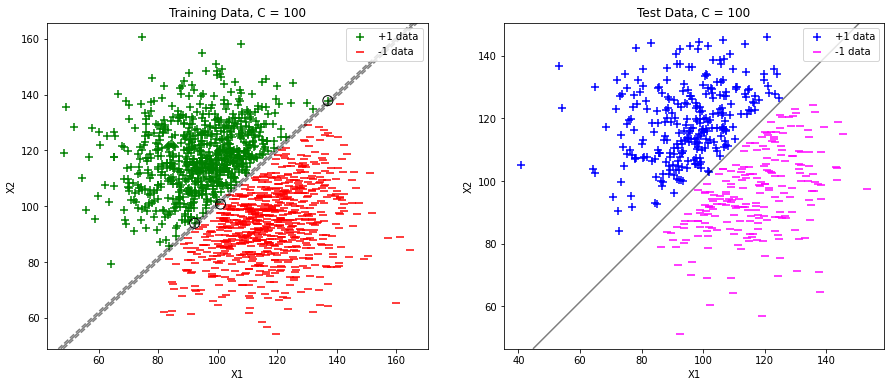

In [ ]:
svm_fun(df, test_df, 100)

###**SVM with C = 1**


Softmargin SVM with C = 1

There are 5 support vectors in total.

They are as follows:

1. [100.9311  100.73895]	Lamda =     1.0
2. [104.27388 103.88415]	Lamda =     0.2559597012658411
3. [136.98964 137.81944]	Lamda =     0.24162123304009936
4. [83.757794 85.622982]	Lamda =     0.014338468225741478
5. [92.264228 93.878451]	Lamda =     1.0

Training Error = 0.0 %
Testing Error = 0.0 %



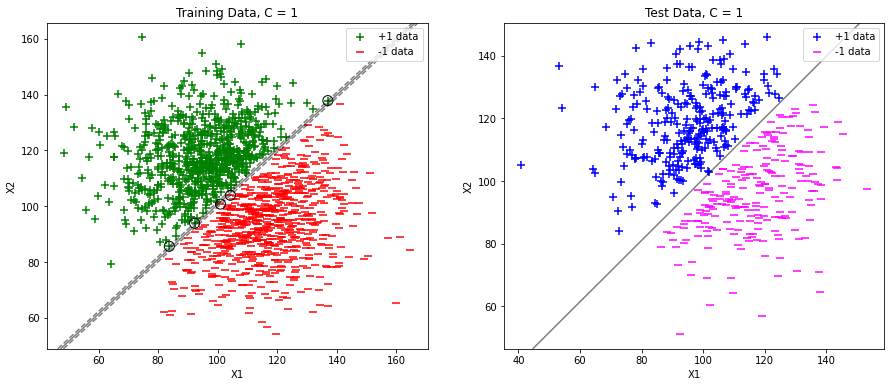

In [ ]:
svm_fun(df, test_df, 1)

###**SVM with C = 0.01**


Softmargin SVM with C = 0.01

There are 35 support vectors in total.

They are as follows:

1. [112.46056 110.13691]	Lamda =     0.01
2. [100.9311  100.73895]	Lamda =     0.01
3. [88.528636 86.489359]	Lamda =     0.01
4. [105.03448 102.61552]	Lamda =     0.01
5. [119.41278 116.82572]	Lamda =     0.01
6. [93.606803 91.770457]	Lamda =     0.01
7. [104.27388 103.88415]	Lamda =     0.01
8. [120.23975 118.46193]	Lamda =     0.01
9. [95.020296 92.605723]	Lamda =     0.0030693382539269142
10. [113.16678 110.58473]	Lamda =     0.01
11. [106.11056 103.52452]	Lamda =     0.01
12. [123.05293 120.70631]	Lamda =     0.01
13. [92.465366 90.793922]	Lamda =     0.01
14. [130.39091 128.9233 ]	Lamda =     0.01
15. [121.50979 120.0312 ]	Lamda =     0.01
16. [89.988021 88.722906]	Lamda =     0.01
17. [109.21581 107.43801]	Lamda =     0.01
18. [118.96266 120.89068]	Lamda =     0.01
19. [109.52663 111.87117]	Lamda =     0.01
20. [95.968294 99.420283]	Lamda =     0.0014694692304490669
21. [104.36462 106.363

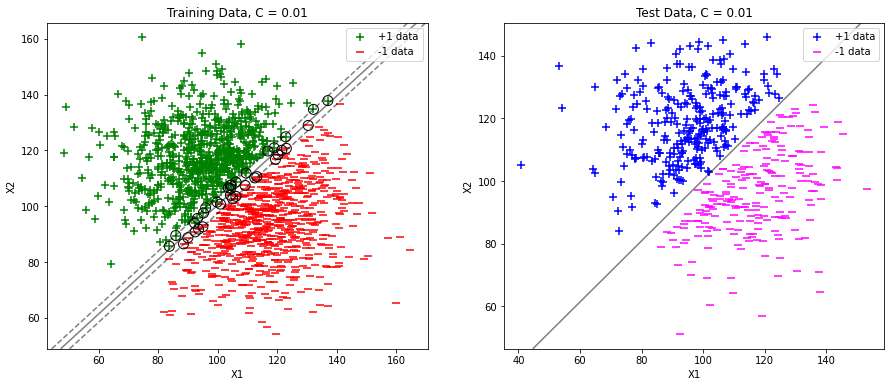

In [ ]:
svm_fun(df, test_df, 0.01)

###**SVM with C = 0.001**


Softmargin SVM with C = 0.001

There are 104 support vectors in total.

They are as follows:

1. [112.46056 110.13691]	Lamda =     0.001
2. [100.9311  100.73895]	Lamda =     0.001
3. [88.528636 86.489359]	Lamda =     0.001
4. [109.31582 105.98703]	Lamda =     0.001
5. [103.11534   98.903068]	Lamda =     0.001
6. [122.29817 118.11854]	Lamda =     0.001
7. [105.03448 102.61552]	Lamda =     0.001
8. [103.30212 100.29471]	Lamda =     0.001
9. [119.41278 116.82572]	Lamda =     0.001
10. [93.606803 91.770457]	Lamda =     0.001
11. [128.84691 123.59529]	Lamda =     0.001
12. [98.809968 94.681455]	Lamda =     0.001
13. [104.27388 103.88415]	Lamda =     0.001
14. [104.91063   99.920557]	Lamda =     0.001
15. [123.00529 118.63968]	Lamda =     0.001
16. [103.25701   99.707239]	Lamda =     0.001
17. [120.23975 118.46193]	Lamda =     0.001
18. [107.87191 104.10484]	Lamda =     0.001
19. [95.020296 92.605723]	Lamda =     0.001
20. [108.64466 103.35504]	Lamda =     0.001
21. [113.16678 110.58473]	La

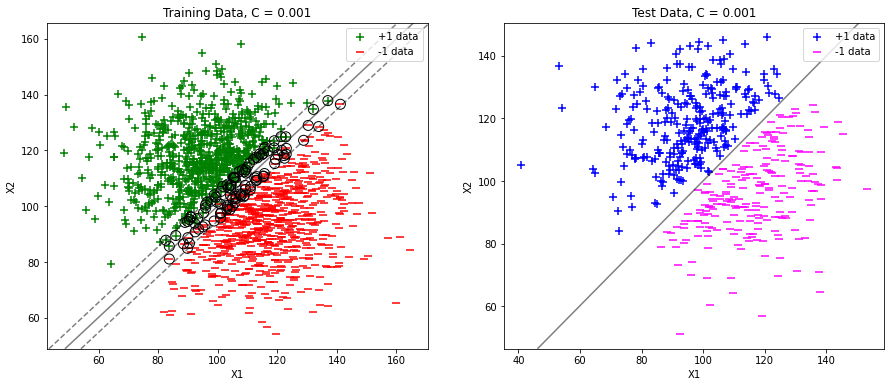

In [ ]:
svm_fun(df, test_df, 0.001)

##**Conclusion**

* The given dataset has been analyzed and the values of the features were found to be **normally distributed**.
* **No null values** were present in the training data and there were **1500 instances and 2 features**. The test data has **500** instances.
* The data set was corresponding to **binary classification** with labels -1 and +1.
* The training data has been visualized with the help of **scatter plot** and found to be well suitable for linear SVM. Compared to the training set 1 in the previous experiment, here the separation between +1 and -1 datapoints is very narrow.
* The softmargin SVM was implemented with linear kernel.
* Different values for the **hyper parameter C** has been experimented and the results were noted.
* In this particular experiment, there was no difference observed when experimented with C = 1000 and 100. In both cases, there were three support vectors.
* Althogh, **when C has been decreased** to 1, and 0.01 and further to 0.001, **more number of support vectors** were found (5, 35 and 104 respectively. This happened because the objective function of the SVM tried to concentrate on increasing the margin and provided less priority to the misclassifications or deviations.
* The **dual coefficient $\lambda$ values** were also studied by displaying them and found to be greater than 0 for all the support vectors and especiallly equal to C for those do not lie on the decision boundaries.
* In all experimented cases, both training error and test error were found to be **zero**.

##**Submitted By:**

####Ahammed Shaneeb N K

####M1, AI: Roll No - 2